# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: kevin velasquez gonzalez
*Métodos computacionales 2025-I*

---

# 1.

<center>

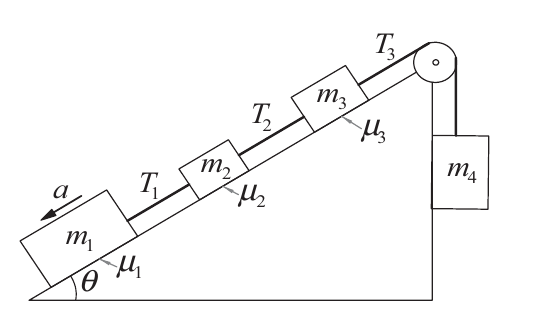

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta)
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta)
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta)
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [3]:
import numpy as np

m = np.array([10, 4, 5, 6])
mu = np.array([0.25, 0.3, 0.2])
g = 9.81
theta = np.pi / 4

A = np.array([
    [1, 0, 0, m[0]],
    [-1, 1, 0, m[1]],
    [0, -1, 1, m[2]],
    [0, 0, -1, m[3]]
], float)

b = np.array([
    m[0]*g*(np.sin(theta)-mu[0]*np.cos(theta)),
    m[1]*g*(np.sin(theta)-mu[1]*np.cos(theta)),
    m[2]*g*(np.sin(theta)-mu[2]*np.cos(theta)),
    -m[3]*g
], float)

x = np.linalg.solve(A, b)

T1 = x[0]
T2 = x[1]
T3 = x[2]
a = x[3]


print(f"T1 = {T1:.2f} N")
print(f"T2 = {T2:.2f} N")
print(f"T3 = {T3:.2f} N")
print(f"a = {a:.2f} m/s^2")

T1 = 35.89 N
T2 = 48.86 N
T3 = 68.54 N
a = 1.61 m/s^2


# 2.
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

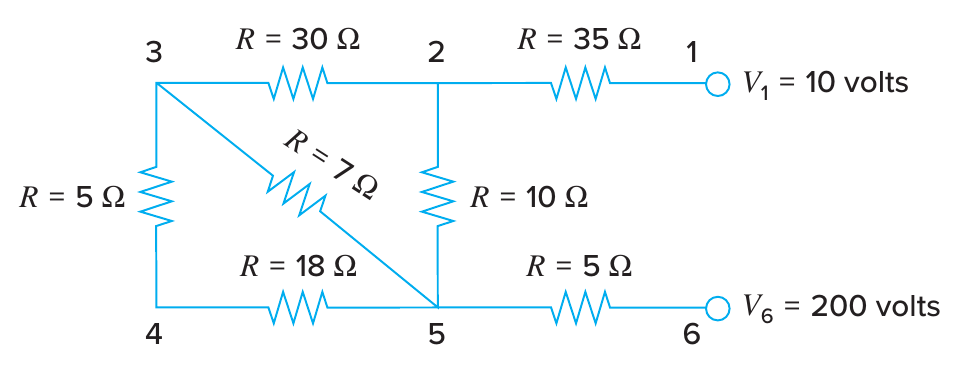


In [4]:
import numpy as np

# Definir resistencias y voltaje
R = 5
R1, R2, R3 = 30, 35, 18
R4, R5, R6, R7 = 10, 5, 10, 10
V1 = 10

# Matriz de coeficientes
A = np.array([
    [1, -1, -1, 0, 0, 0],   # Nodo 1
    [0, 1, 0, -1, -1, 0],   # Nodo 2
    [0, 0, 1, 1, 0, -1],    # Nodo 3
    [R1, R2, 0, R3, 0, 0],  # Malla 1
    [0, -R2, R4, 0, R5, R6],# Malla 2
    [0, 0, 0, -R3, -R5, R7] # Malla 3
])

# Vector de términos independientes
b = np.array([0, 0, 0, V1, 0, 0])

# Resolver el sistema
corrientes = np.linalg.solve(A, b)

# Mostrar resultados
print("Corrientes:")
print(f"i12 = {corrientes[0]:.4f} A")
print(f"i13 = {corrientes[1]:.4f} A")
print(f"i23 = {corrientes[2]:.4f} A")
print(f"i24 = {corrientes[3]:.4f} A")
print(f"i25 = {corrientes[4]:.4f} A")
print(f"i35 = {corrientes[5]:.4f} A")

Corrientes:
i12 = 0.1585 A
i13 = 0.0775 A
i23 = 0.0810 A
i24 = 0.1408 A
i25 = -0.0634 A
i35 = 0.2218 A


# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})),
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


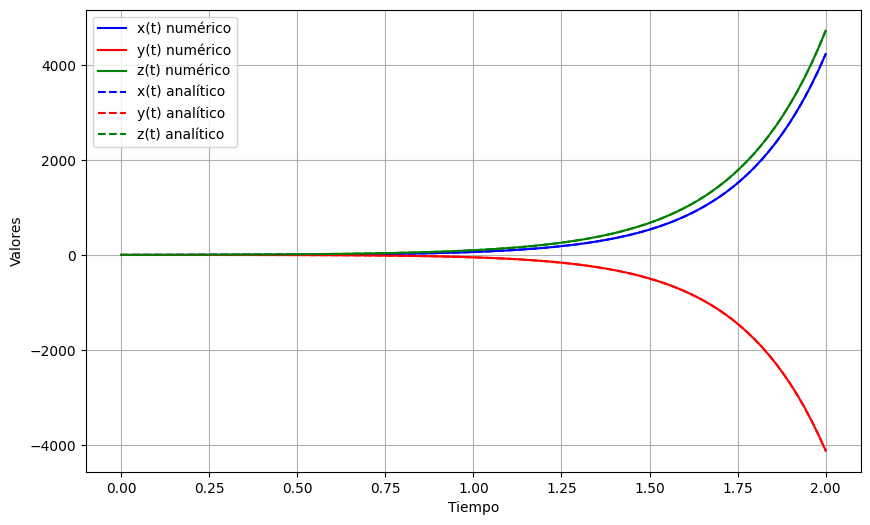

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la matriz A
A = np.array([[2, -1, 1],
              [0, 3, -1],
              [2, 1, 3]])

# Diagonalización de A
valores_propios, U = np.linalg.eig(A)
D = np.diag(valores_propios)
U_inv = np.linalg.inv(U)

# Función para calcular exp(At)
def exp_At(t):
    exp_Dt = np.diag(np.exp(valores_propios * t))
    return U @ exp_Dt @ U_inv

# Condiciones iniciales
r0 = np.array([1, 1, 2])

# Solución numérica
t = np.linspace(0, 2, 100)
sol = np.array([exp_At(ti) @ r0 for ti in t])
x_num, y_num, z_num = sol[:, 0], sol[:, 1], sol[:, 2]

# Solución analítica
def sol_analitica(t, x0, y0, z0):
    x = (x0*(np.exp(2*t)*(1 + np.exp(2*t) - 2*t)) + y0*(-2*t*np.exp(2*t)) + z0*(np.exp(2*t)*(-1 + np.exp(2*t))))/2
    y = (x0*(-np.exp(2*t)*(-1 + np.exp(2*t) - 2*t)) + y0*(2*(t + 1)*np.exp(2*t)) + z0*(-np.exp(2*t)*(-1 + np.exp(2*t))))/2
    z = (x0*(np.exp(2*t)*(-1 + np.exp(2*t) + 2*t)) + y0*(2*t*np.exp(2*t)) + z0*(np.exp(2*t)*(1 + np.exp(2*t))))/2
    return x, y, z

x_ana, y_ana, z_ana = sol_analitica(t, 1, 1, 2)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(t, x_num, 'b-', label='x(t) numérico')
plt.plot(t, y_num, 'r-', label='y(t) numérico')
plt.plot(t, z_num, 'g-', label='z(t) numérico')
plt.plot(t, x_ana, 'b--', label='x(t) analítico')
plt.plot(t, y_ana, 'r--', label='y(t) analítico')
plt.plot(t, z_ana, 'g--', label='z(t) analítico')
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.legend()
plt.grid()
plt.show()

# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix}
B_z & B_x - iB_y \\
B_x + iB_y & -B_z
\end{pmatrix}
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [9]:
import numpy as np

# Parámetros físicos
gamma = 2  # Razón giromagnética
hbar = 1   # Unidades naturales
Bz = 1     # Campo magnético en z (1 gauss)
Bx, By = 0, 0  # Componentes x e y del campo

# Construir Hamiltoniano
H = -gamma*hbar/2 * np.array([
    [Bz, Bx - 1j*By],
    [Bx + 1j*By, -Bz]
])

# Verificar que es hermítico
print("¿Es hermítico?:", np.allclose(H, H.conj().T))

# Calcular valores y vectores propios
valores, vectores = np.linalg.eigh(H)

# Mostrar niveles de energía
print("\nNiveles de energía:")
for i, E in enumerate(valores):
    print(f"E_{i+1} = {E:.4f}")

# Normalizar y mostrar autovectores
print("\nAutovectores normalizados:")
for i in range(2):
    v = vectores[:, i]
    v_normalizado = v / np.linalg.norm(v)
    print(f"l_{i+1} = {v_normalizado}")

¿Es hermítico?: True

Niveles de energía:
E_1 = -1.0000
E_2 = 1.0000

Autovectores normalizados:
l_1 = [1.+0.j 0.+0.j]
l_2 = [0.+0.j 1.+0.j]


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura.

<center>

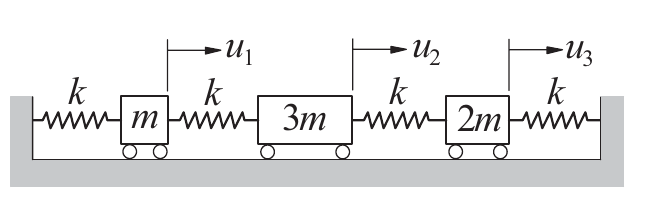
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [7]:
import numpy as np

# Definir constantes (k y m se cancelan en el cálculo)
k = 1  # Valor arbitrario (resultado será en términos de sqrt(k/m))
m = 1  # Valor arbitrario

# Matriz del sistema
K = np.array([
    [2, -1, 0],
    [-1, 2, -1],
    [0, -1, 2]
])

M = np.array([
    [1, 0, 0],
    [0, 3, 0],
    [0, 0, 2]
])

# Resolver el problema de valores propios generalizado
valores_propios, modos = np.linalg.eig(np.linalg.inv(M) @ K)

# Frecuencias naturales (omega = sqrt(lambda))
omega = np.sqrt(valores_propios) * np.sqrt(k/m)

# Mostrar resultados
print("Frecuencias naturales (ω/√(k/m)):")
for i, w in enumerate(omega):
    print(f"ω_{i+1} = {w:.4f} √(k/m)")

print("\nModos de vibración (vectores propios):")
for i in range(3):
    print(f"Modo {i+1}: {modos[:, i]}")

Frecuencias naturales (ω/√(k/m)):
ω_1 = 1.4943 √(k/m)
ω_2 = 0.5028 √(k/m)
ω_3 = 1.0867 √(k/m)

Modos de vibración (vectores propios):
Modo 1: [-0.96983375  0.22589817 -0.0916107 ]
Modo 2: [-0.42955167 -0.75050344 -0.502225  ]
Modo 3: [-0.38362421 -0.31421871  0.86838877]
